In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
matplotlib.rc("font",family = "NanumGothic")


# Step1. 데이터 속성 및 기술통계량 확인

In [2]:
titanic = pd.read_csv("data/BigData/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic.describe(exclude="object")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.describe(include ="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lindahl, Miss. Agda Thorilda Viktoria",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
titanic.Survived.value_counts(normalize=True)


0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### 생존률 확인

Text(0.5, 1.0, '생존률')

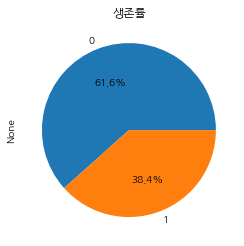

In [7]:

titanic_size = titanic.groupby(['Survived']).size()
titanic_size.plot.pie(y="Survived", autopct ="%.1f%%")
plt.title("생존률")

# Step2. 변수 결측/이상치 처리 및 기술통계량 확인

#### 2-0. 결측치 확인하기

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin 687, Embarked 2 결측치 존재 확인

#### 2-1. Embarked 결측치 대체값 찾기

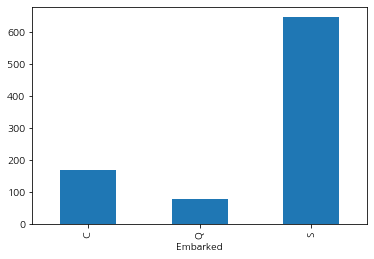

In [133]:
sur = titanic.groupby('Embarked')['PassengerId'].count()
sur.plot.bar()

In [9]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
titanic.groupby([ 'Age'])['Fare'].mean()

Age
0.42       8.516700
0.67      14.500000
0.75      19.258300
0.83      23.875000
0.92     151.550000
1.00      30.005957
2.00      37.536250
3.00      25.781950
4.00      29.543330
5.00      22.717700
6.00      25.583333
7.00      31.687500
8.00      28.300000
9.00      27.938538
10.00     26.025000
11.00     54.240625
12.00     11.241700
13.00     13.364600
14.00     42.625700
14.50     14.454200
15.00     49.655020
16.00     25.745100
17.00     28.389423
18.00     38.063462
19.00     27.869496
20.00      8.624173
20.50      7.250000
21.00     31.565621
22.00     25.504781
23.00     37.994720
            ...    
44.00     29.758333
45.00     36.818408
45.50     17.862500
46.00     55.458333
47.00     27.601389
48.00     37.893067
49.00     59.929183
50.00     64.025830
51.00     28.752386
52.00     51.402783
53.00     51.479200
54.00     44.477087
55.00     23.250000
55.50      8.050000
56.00     43.976025
57.00     11.425000
58.00     93.901660
59.00     10.375000
60.00     55.000

#### 최빈값으로 대체

In [12]:
titanic['Embarked'].fillna("S", inplace=True)

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### 2-2. Cabin 대체값 찾기

In [14]:
titanic[titanic['Cabin'].notnull()]['Embarked'].value_counts()

S    131
C     69
Q      4
Name: Embarked, dtype: int64

In [137]:
titanic.groupby('Position')['PassengerId'].count() / titanic.groupby('Position')['Survived'].count()

Position
0    1.0
A    1.0
B    1.0
C    1.0
D    1.0
E    1.0
F    1.0
G    1.0
T    1.0
dtype: float64

In [15]:
titanic[titanic['Cabin']=="C23 C25 C27"]#.value_counts()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


In [16]:
cabin_fillna = titanic['Cabin'].fillna("0")
titanic['Position']=[x[0] for x in cabin_fillna]

In [17]:
titanic[titanic['Cabin'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Position
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0


In [18]:
titanic.drop('Cabin', inplace=True, axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Position
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


#### Name 삭제

In [19]:
titanic.drop('Name', inplace=True, axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Position
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0


In [37]:
titanic['Age'].value_counts().head()

30.0    202
24.0     30
22.0     27
18.0     26
28.0     25
Name: Age, dtype: int64

### 연령대 별 생존률 확인

In [22]:
titanic['연령대'].value_counts()

30대    344
20대    220
10대    102
40대     89
00대     62
50대     48
60대     19
70대      6
80대      1
Name: 연령대, dtype: int64

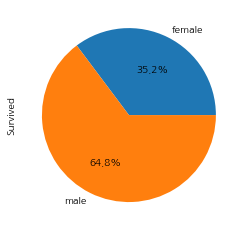

In [139]:
titanic_size=titanic.groupby(['Sex'])['Survived'].count()
titanic_size.plot.pie(y="Survived", autopct="%.1f%%")

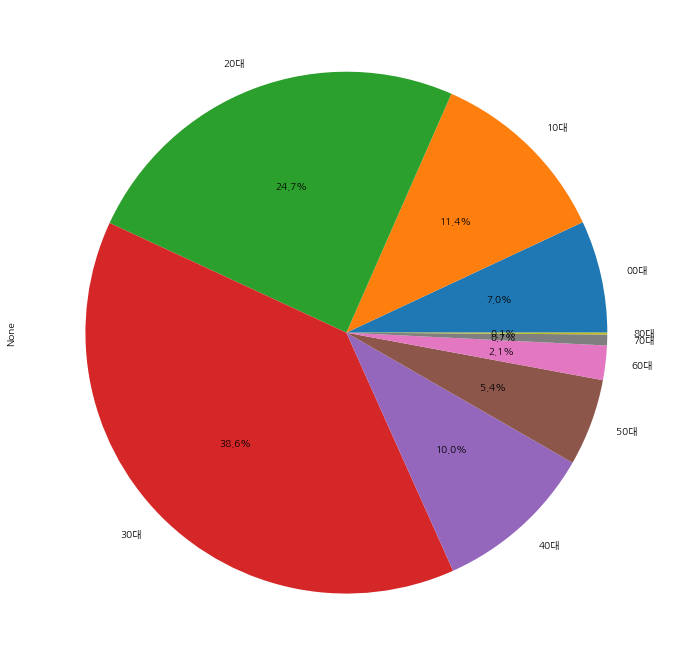

In [54]:
fig = plt.figure(figsize=[12, 12])
titanic_size = titanic.groupby(['연령대']).size()
titanic_size.plot.pie(y="Survived", autopct ="%.1f%%")


# Step3. 목표변수 및 설명변수(명목형/수치형 변수별)의 분포 확인

### 가설)Fare가 생존과 관련이 있을 것이다.

In [24]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Position', '연령대'],
      dtype='object')

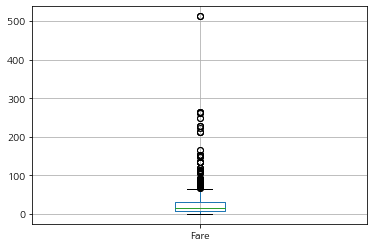

In [25]:
titanic.boxplot(column="Fare")

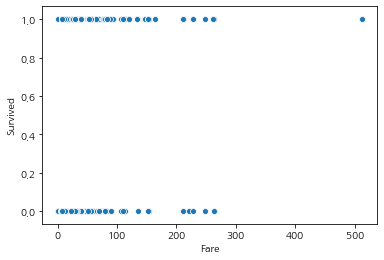

In [58]:
sns.scatterplot(x=titanic['Fare'], y=titanic['Survived'])

In [59]:
titanic.groupby(['Survived'])['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

### 가설
    승객 등급이 생존과 관련이 있을 것이다.
    가설 검증 방법)
    Pclass별로 데이터를 groupby 해서 Survived의 1(Survived)를 count 해서 등급별 생존한 사람을 세어보자

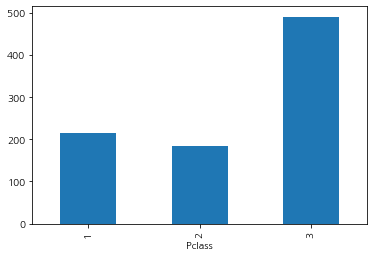

In [26]:
sur = titanic.groupby('Pclass')['Survived'].count()
sur.plot.bar()

In [76]:
maleDataSet = titanic[titanic["Sex" == "male"]]
femaleDataSet = titanic[titanic["Sex" == "female"]]

plt.bar(0, male.Survived.count())
plt.bar(0, female.Survived.count(), bottom=male.Height.count())
plt.show()

KeyError: False

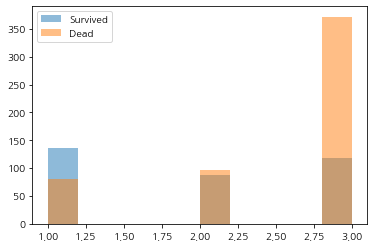

In [81]:
plt.hist(titanic[titanic['Survived']==1]['Pclass'],label="Survived", alpha=0.5)
plt.hist(titanic[titanic['Survived']==0]['Pclass'],label="Dead", alpha=0.5)
plt.legend()
plt.show()

### 가설
    객실의 위치가 생존과 관련이 있을 것이다.
    가설 검증 방법)
    Cabin 에 Nan값이 많기 때문에 우선 이를 처리해야 한다.

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Position,연령대
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,20대
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,C,30대
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,20대
3,4,1,1,female,35.0,1,0,113803,53.1000,S,C,30대
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,30대


In [28]:
titanic.groupby(['Position'])['Fare'].mean()

Position
0     19.157325
A     39.623887
B    113.505764
C    100.151341
D     57.244576
E     46.026694
F     18.696792
G     13.581250
T     35.500000
Name: Fare, dtype: float64

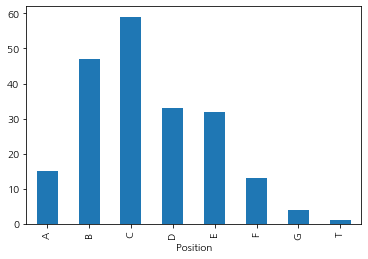

In [29]:
sur = titanic[titanic['Position'] != "0"].groupby('Position')['Survived'].count()
sur.plot.bar()

# sns.countplot(x="Position", data=titanic, y="Survived")
# plt.title("타이타닉호의 각 숙소의 위치별,  생존 승객 수")
# plt.show()

No handles with labels found to put in legend.


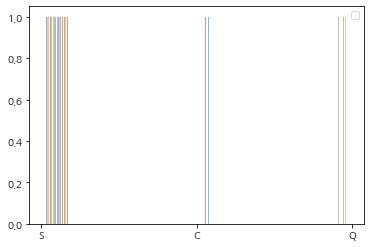

In [125]:
plt.hist(titanic['Embarked'], alpha=0.5)
plt.legend()
plt.show()

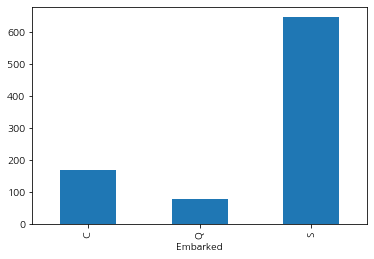

In [126]:
sur = titanic.groupby('Embarked')['Survived'].count()
sur.plot.bar()

### 탑승지별 생존률

Embarked
C    0.553571
Q    0.389610
S    0.339009
dtype: float64


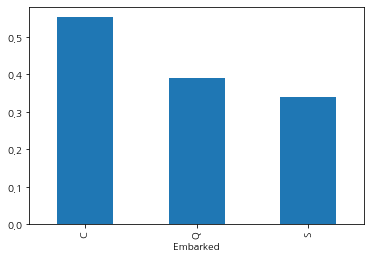

In [130]:
temp=titanic.groupby('Embarked')['Survived'].sum()/titanic.groupby('Embarked')['PassengerId'].count()
print(temp)
temp.plot.bar()

In [127]:
titanic.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Position,연령대,Family_size
Embarked,,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,77,77,77
S,646,646,646,646,646,646,646,646,646,646,646,646


In [123]:
titanic.groupby(['Embarked','Survived'])['Fare'].mean()

Embarked  Survived
C         0           35.443335
          1           79.720926
Q         0           13.335904
          1           13.182227
S         0           20.743987
          1           39.916514
Name: Fare, dtype: float64

In [124]:
titanic.groupby('Embarked')['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.243651
Name: Fare, dtype: float64

### 가설
가족과 함께 탑승한 인원의 생존률이 그렇지 않은 경우보다 클 것이다.

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Position,연령대
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,20대
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,C,30대
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,20대
3,4,1,1,female,35.0,1,0,113803,53.1000,S,C,30대
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,30대


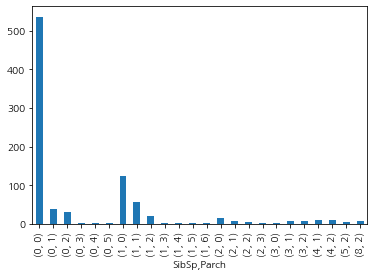

In [31]:
sur = titanic.groupby(['SibSp','Parch'])['Survived'].count()
sur.plot.bar()

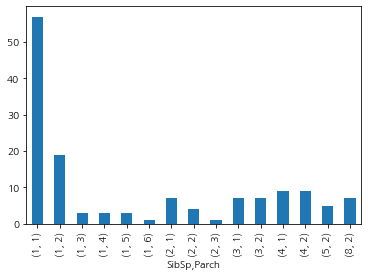

In [32]:
sur = titanic[(titanic['SibSp'] != 0) & (titanic['Parch']!=0)].groupby(['SibSp','Parch'])['Survived'].count()
sur.plot.bar()

In [63]:
titanic['Family_size']=titanic['Parch']+titanic['SibSp']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Position,연령대,Family_size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,20대,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,C,30대,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,20대,0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,C,30대,1
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,30대,0


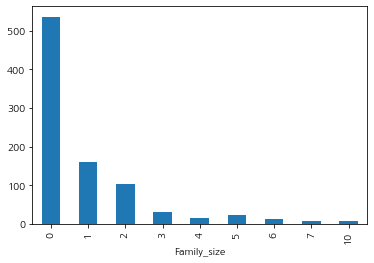

In [67]:
sur=titanic.groupby('Family_size')['Survived'].count()
sur.plot.bar()

# Step4. 그래프 분석을 통해 변수간 관계를 확인

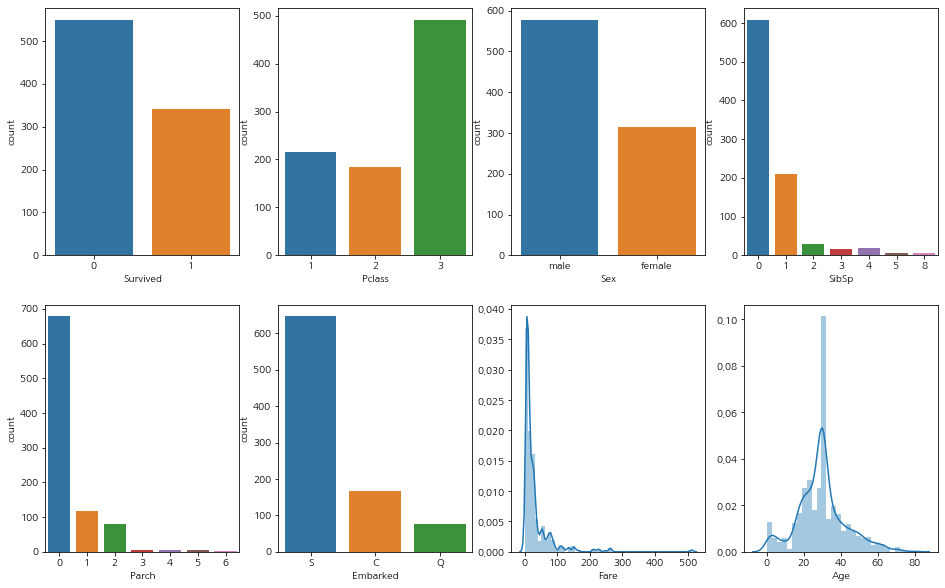

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=titanic,ax=axes[0,0])
sns.countplot('Pclass',data=titanic,ax=axes[0,1])
sns.countplot('Sex',data=titanic,ax=axes[0,2])
sns.countplot('SibSp',data=titanic,ax=axes[0,3])
sns.countplot('Parch',data=titanic,ax=axes[1,0])
sns.countplot('Embarked',data=titanic,ax=axes[1,1])
sns.distplot(titanic['Fare'], kde=True,ax=axes[1,2])
sns.distplot(titanic['Age'].dropna(),kde=True,ax=axes[1,3])

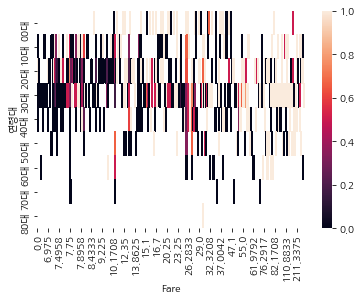

In [34]:
temp=titanic[['Fare','Survived','연령대']]
temp.reset_index(inplace=True)

temp
t_pivot=temp.pivot_table('Survived','연령대','Fare')
sns.heatmap(t_pivot)

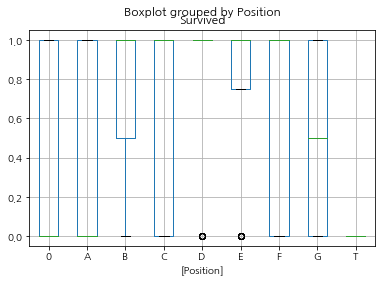

In [41]:
titanic.boxplot(column="Survived", by=['Position'])

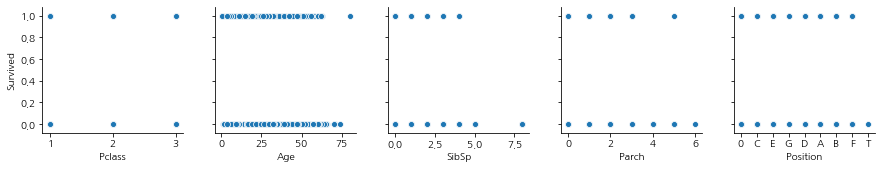

In [46]:
sns.pairplot(titanic, y_vars=['Survived'], x_vars=['Pclass','Age','SibSp','Parch','Position'])

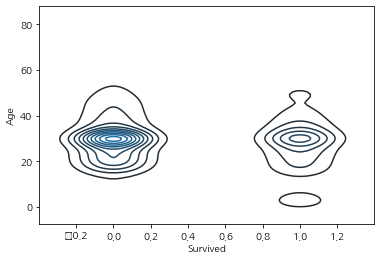

In [49]:
sns.kdeplot(titanic['Survived'],titanic['Age'], shade=False)